<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/PropiedadesEstrellas1.PNG" alt="drawing" width="450">

Ejercicios realizados en el curso de edX **Data Science: visualization**, impartido por el profesor **Rafael Irizarry** de la Universidad de Harvard. En este notebook se revisa una base de datos que contiene algunas propiedades muy interesantes sobre las estrellas.

## Base de datos

Primero cargamos las librerías necesarias para este ejemplo

In [1]:
library(tidyverse)
library(dslabs)
library(ggrepel)
library(ggthemes)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Se carga la base de datos y se revisan sus variables.

In [2]:
data(stars)
head(stars)

,star,magnitude,temp,type
,<fct>,<dbl>,<int>,<chr>
1,Sun,4.8,5840,G
2,SiriusA,1.4,9620,A
3,Canopus,-3.1,7400,F
4,Arcturus,-0.4,4590,K
5,AlphaCentauriA,4.3,5840,G
6,Vega,0.5,9900,A


## Magnitud o luminisidad de las estrellas

La magnitud de las estrellas es una medida de la luminosidad de las estrellas. Mientras más bajo sea el valor de la magnitud de una estrella, más luminosa será ésta. Revisamos el valor medio y la desviación estándar de la magnitud de las estrellas en nuestra base de datos.

In [3]:
mean(stars$magnitude)
sd(stars$magnitude)

[1] 4.257292

[1] 7.354308

Ahora graficamos la función de distribución de la magnitud de las estrellas. Se observa que **la gráfica es bimodal** teníendose dos picos para las magnitudes de -2 y +12.

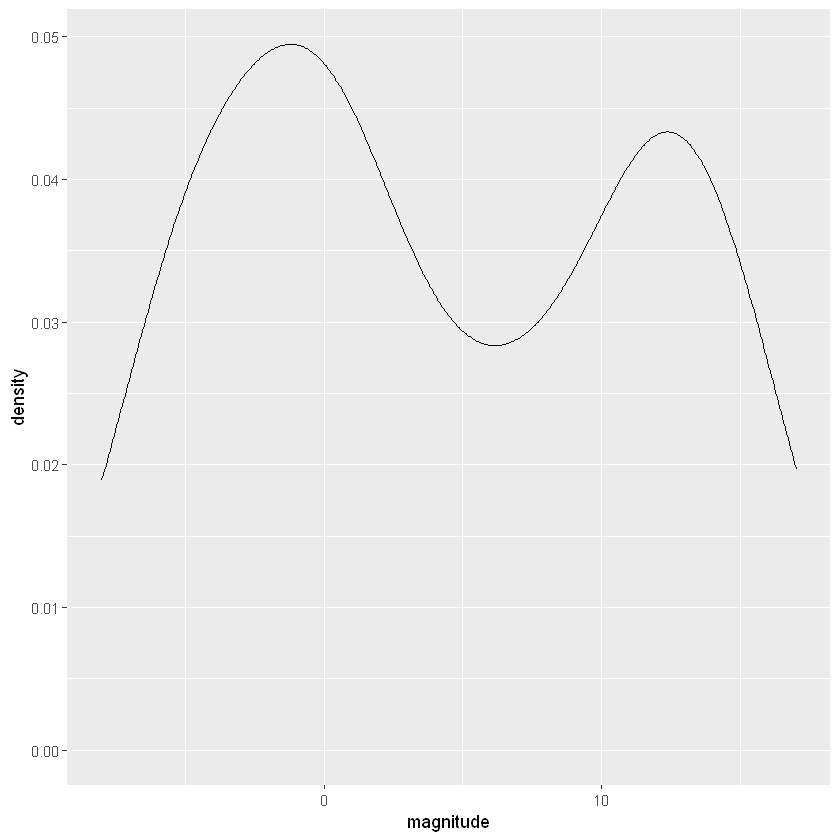

In [4]:
stars %>%
  ggplot(aes(magnitude))+geom_density()

## Temperatura de las estrellas

Calculamos el valor medio de la temperatura de las estrellas en nuestra base de datos. El valor se encuentra en grados kelvin.

In [5]:
mean(stars$temp)

[1] 8752.292

Graficamos el histograma de las temperaturas, se observa que **las estrellas con bajas temperaturas son las más comunes**. 

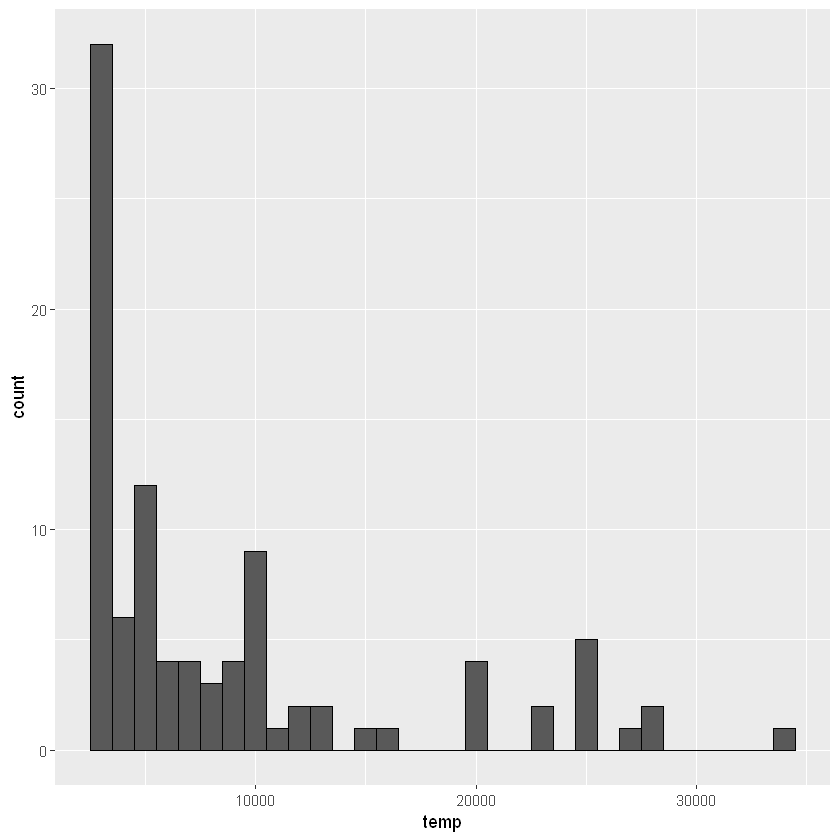

In [6]:
stars %>%
  ggplot(aes(temp))+geom_histogram(binwidth=1000, color="black")


## Temperatura y magnitud

Ahora graficamos la temperatura frente a magnitud, la gráfica muestra una ley de decreción exponencial. No todas las estrellas siguen esta ley, pero las que lo hacen se denominan como **estrellas de secuencia media**.

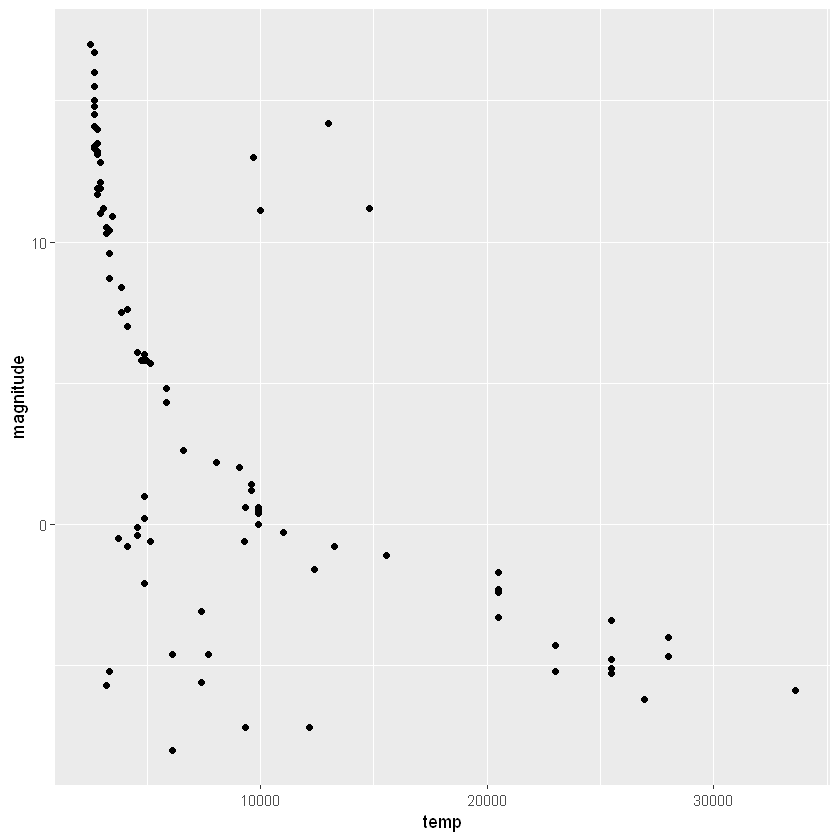

In [7]:
stars %>%
  ggplot(aes(temp,magnitude))+geom_point()

Los astrónomos suele graficar la temperatura contra la magnitud de la siguiente manera: con la temperatura en escala logarítmica y con los ejes invertidos.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



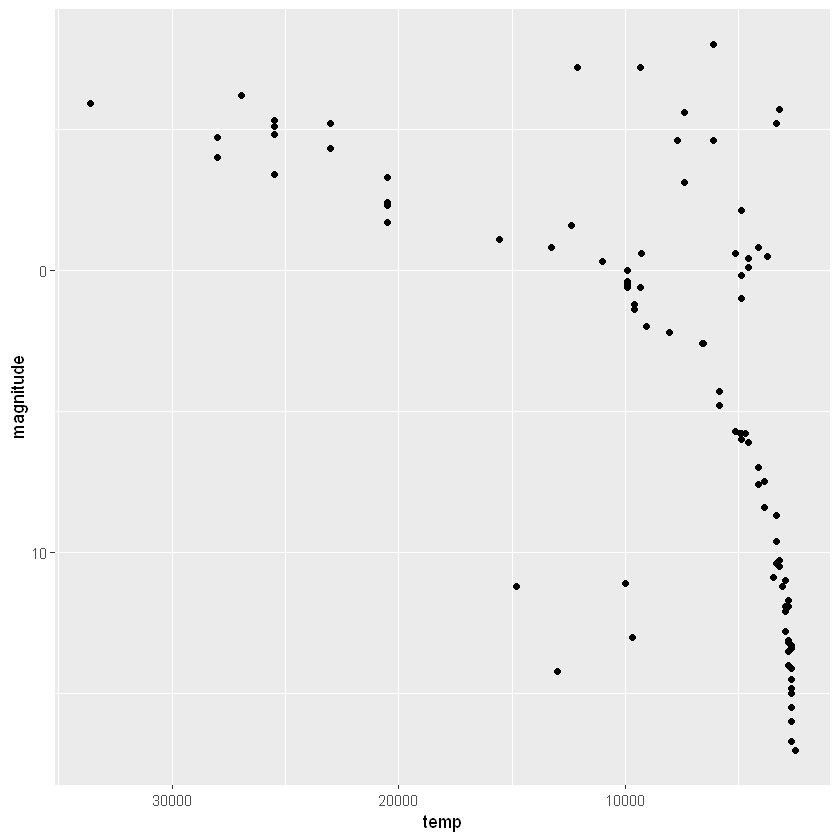

In [8]:
stars %>%
  ggplot(aes(temp,magnitude))+geom_point()+
  scale_y_reverse()+
  scale_x_continuous(trans="log10")+
  scale_x_reverse()

Ahora añadimos etiquetas al gráfico que muestran los nombres de las estrellas de la base de datos. 

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
"ggrepel: 33 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


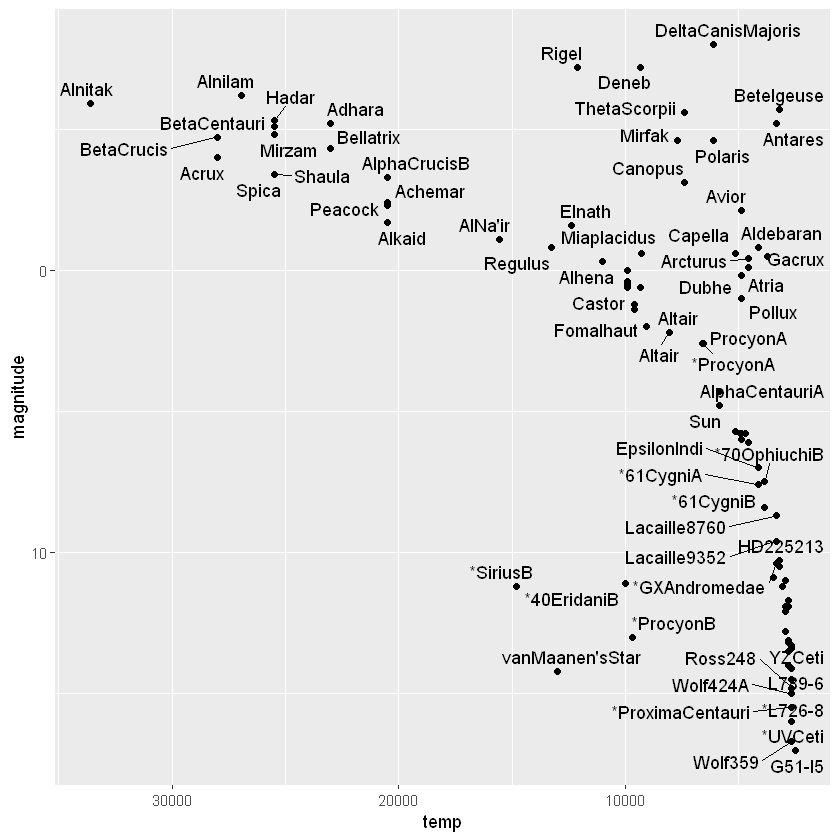

In [9]:
# Se añaden etiquetas al gráfico
stars %>%
  ggplot(aes(temp,magnitude,label=star))+geom_point()+
  scale_y_reverse()+scale_x_continuous(trans="log10")+
  scale_x_reverse()+geom_text_repel()


Las **estrellas que son más calientes pero con baja luminosidad** (con respecto a las estrellas de secuencia media) son **las enanas blanca**. Se observan 4 estrellas de este tipo en la muestra. Se observa que en nuestra base de datos hay 4 de ellas.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Removed 92 rows containing missing values (geom_point)."
Warning message:
"Removed 92 rows containing missing values (geom_text_repel)."


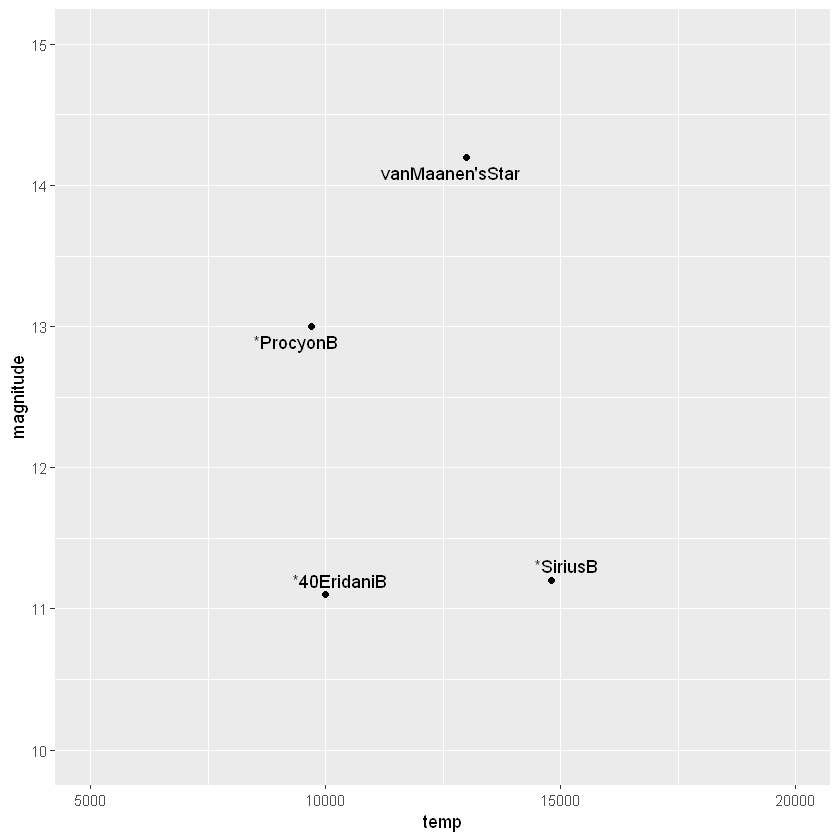

In [10]:
stars %>%
  ggplot(aes(temp,magnitude,label=star))+geom_point()+
  scale_y_reverse()+scale_x_continuous(trans="log10")+
  scale_x_reverse()+geom_text_repel()+
  scale_x_continuous(limits = c(5000, 20000))+
  scale_y_continuous(limits = c(10, 15))

Las estrellas que son **más luminosas pero con baja temperatura son las gigantes**. Su temperatura media es aprox. 5,000 kelvin

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Removed 94 rows containing missing values (geom_point)."
Warning message:
"Removed 94 rows containing missing values (geom_text_repel)."


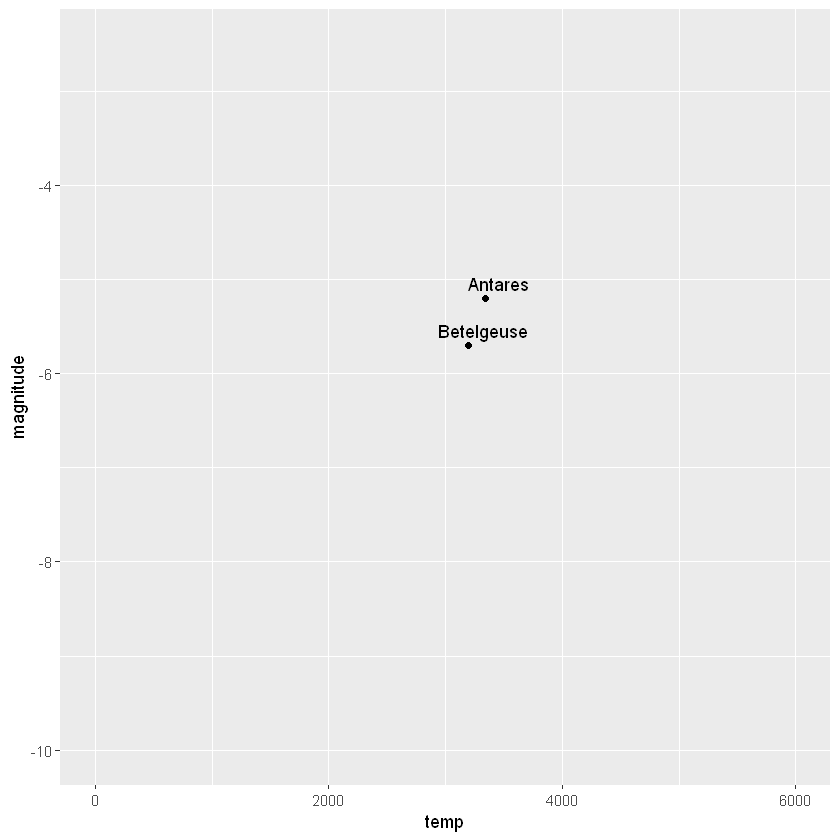

In [11]:
stars %>%
  ggplot(aes(temp,magnitude,label=star))+geom_point()+
  scale_y_reverse()+scale_x_continuous(trans="log10")+
  scale_x_reverse()+geom_text_repel()+
  scale_x_continuous(limits = c(0, 6000))+
  scale_y_continuous(limits = c(-10, -2.5))

Por último, agregamos calor a los puntos en función del **tipo de estrella** al que corresponde el dato. El Sol es una estella de tipo G.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



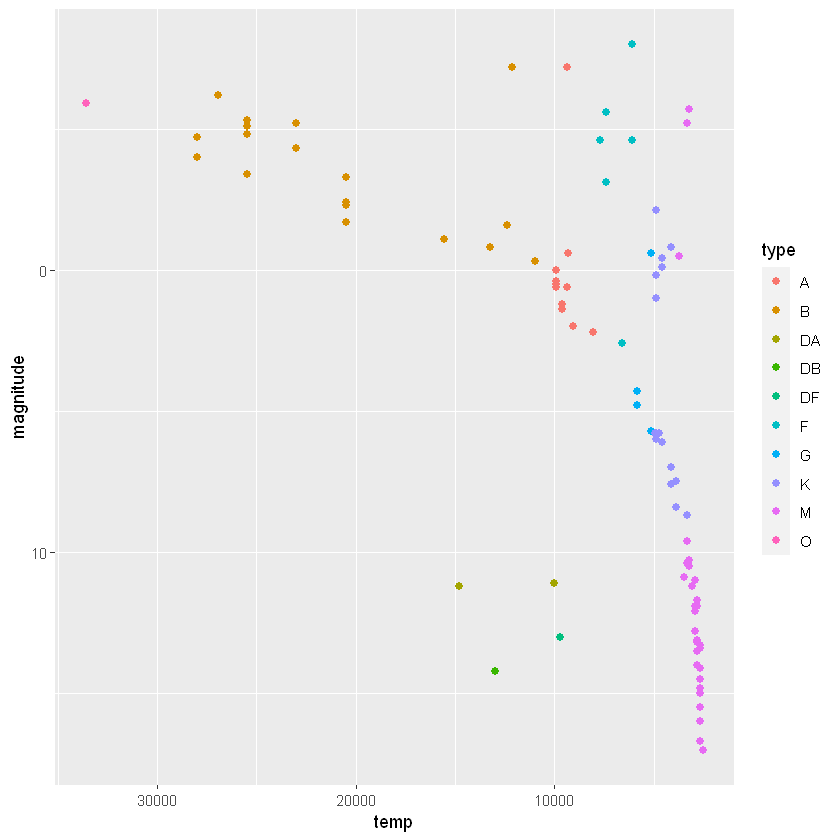

In [12]:
stars %>%
  ggplot(aes(temp,magnitude,color=type))+geom_point(size=2)+
  scale_y_reverse()+scale_x_continuous(trans="log10")+
  scale_x_reverse()